# Purpose
The purpose of this notebook is to investigate what are the relationships between the rotational value and their corresponding output. In particular, we would investigate:
- Rx itself
- Ry itself
- Rz itself
- Their permutations
- Does two levels of Rx interfere with one another or independent (two level means, well, two qubits. )

In [16]:
import qiskit
from qiskit import *
from qiskit.compiler import assemble
from qiskit.visualization import plot_histogram

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from tqdm import tqdm

In [6]:
shots = 5000
backend = Aer.get_backend('qasm_simulator')

Try first with Rx and see what we got. 

In [14]:
df = pd.DataFrame()

for x in tqdm(np.arange(0, np.pi, 0.01)):
    qc = QuantumCircuit(1, 1)
    qc.rx(x, 0)
    qc.measure(0, 0)

    circ = transpile(qc, backend)
    qobj = assemble(circ, shots=shots)
    result = backend.run(qobj).result()
    counts = result.get_counts()

    df_temp = pd.DataFrame(counts, index=[1])
    df_temp["rot_value"] = x

    df = pd.concat([df, df_temp])

df = df.fillna(0)

  0%|          | 0/315 [00:00<?, ?it/s]

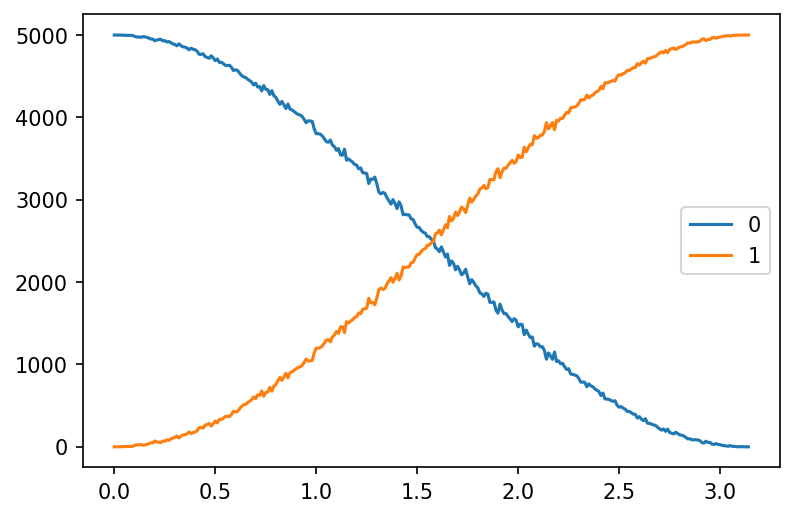

In [18]:
plt.figure(dpi=150)
plt.plot(df["rot_value"], df["0"], label="0")
plt.plot(df["rot_value"], df["1"], label="1")
plt.legend()

Ok, so Rx himself actually can give us the values we would need. Now we would try see Ry. 

100%|██████████| 315/315 [00:03<00:00, 81.11it/s]


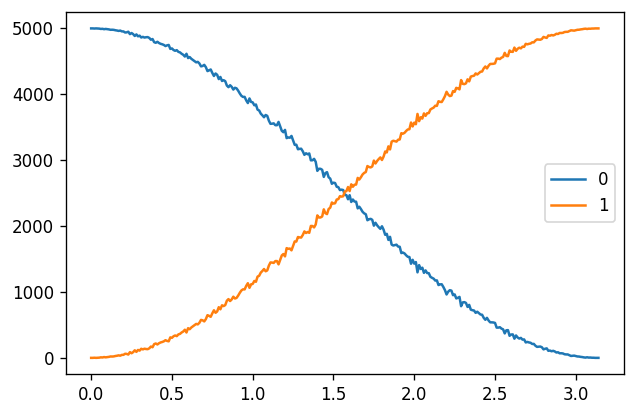

In [41]:
df = pd.DataFrame()

for x in tqdm(np.arange(0, np.pi, 0.01)):
    qc = QuantumCircuit(1, 1)
    qc.ry(x, 0)
    qc.measure(0, 0)

    circ = transpile(qc, backend)
    qobj = assemble(circ, shots=shots)
    result = backend.run(qobj).result()
    counts = result.get_counts()

    df_temp = pd.DataFrame(counts, index=[1])
    df_temp["rot_value"] = x

    df = pd.concat([df, df_temp])

df = df.fillna(0)

plt.figure(dpi=120)
try:
    plt.plot(df["rot_value"], df["0"], label="0")
except KeyError:
    pass

try:
    plt.plot(df["rot_value"], df["1"], label="1")
except KeyError:
    pass
plt.legend()
plt.show()

Also the same shape as for Rx. Would hypothesize same shape for Rz as well, let's check it out. 

100%|██████████| 315/315 [00:03<00:00, 84.42it/s]


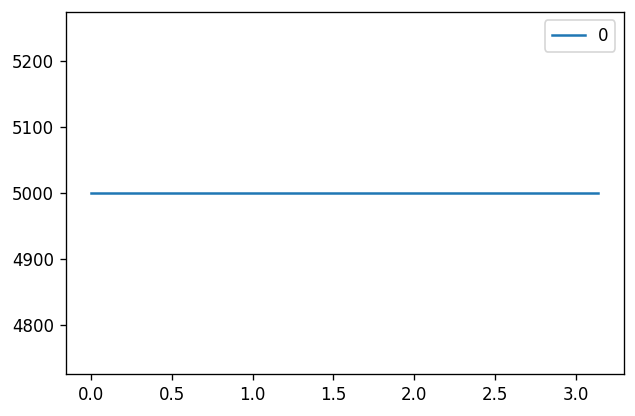

In [45]:
df = pd.DataFrame()

for x in tqdm(np.arange(0, np.pi, 0.01)):
    qc = QuantumCircuit(1, 1)
    qc.rz(x, 0)
    qc.measure(0, 0)

    circ = transpile(qc, backend)
    qobj = assemble(circ, shots=shots)
    result = backend.run(qobj).result()
    counts = result.get_counts()

    df_temp = pd.DataFrame(counts, index=[1])
    df_temp["rot_value"] = x

    df = pd.concat([df, df_temp])

df = df.fillna(0)

plt.figure(dpi=120)
try:
    plt.plot(df["rot_value"], df["0"], label="0")
except KeyError:
    pass

try:
    plt.plot(df["rot_value"], df["1"], label="1")
except KeyError:
    pass
plt.legend()
plt.show()

Oh, no change. Looks like rotation along Z axis is imaginary and no global changes. We would try to combine Rx and Ry this time and see how the graph looks like. 

100%|██████████| 315/315 [00:05<00:00, 62.79it/s]


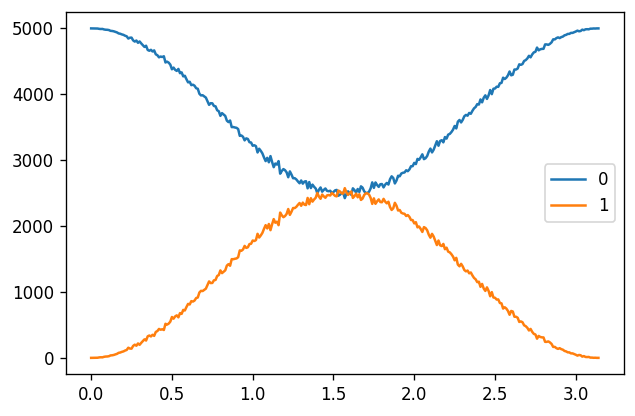

In [46]:
df = pd.DataFrame()

for x in tqdm(np.arange(0, np.pi, 0.01)):
    qc = QuantumCircuit(1, 1)
    qc.rx(x, 0)
    qc.ry(x, 0)
    qc.measure(0, 0)

    circ = transpile(qc, backend)
    qobj = assemble(circ, shots=shots)
    result = backend.run(qobj).result()
    counts = result.get_counts()

    df_temp = pd.DataFrame(counts, index=[1])
    df_temp["rot_value"] = x

    df = pd.concat([df, df_temp])

df = df.fillna(0)

plt.figure(dpi=120)
try:
    plt.plot(df["rot_value"], df["0"], label="0")
except KeyError:
    pass

try:
    plt.plot(df["rot_value"], df["1"], label="1")
except KeyError:
    pass
plt.legend()
plt.show()

Ok, so by combining them we actually might not be able to get what we want since now 0 and 1 does not cover the full range of values. How about Rx and Rz? 

100%|██████████| 315/315 [00:05<00:00, 53.48it/s]


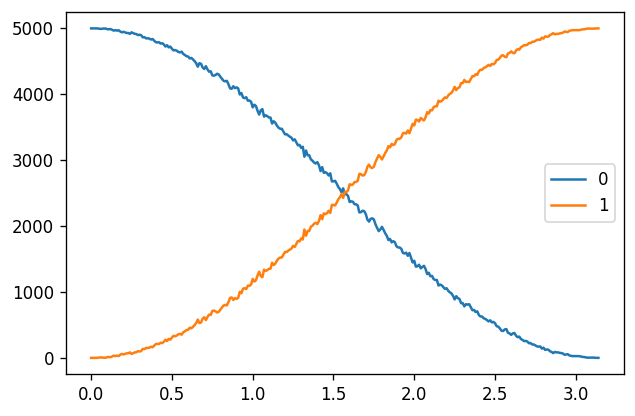

In [48]:
df = pd.DataFrame()

for x in tqdm(np.arange(0, np.pi, 0.01)):
    qc = QuantumCircuit(1, 1)
    qc.rx(x, 0)
    qc.rz(x, 0)
    qc.measure(0, 0)

    circ = transpile(qc, backend)
    qobj = assemble(circ, shots=shots)
    result = backend.run(qobj).result()
    counts = result.get_counts()

    df_temp = pd.DataFrame(counts, index=[1])
    df_temp["rot_value"] = x

    df = pd.concat([df, df_temp])

df = df.fillna(0)

plt.figure(dpi=120)
try:
    plt.plot(df["rot_value"], df["0"], label="0")
except KeyError:
    pass

try:
    plt.plot(df["rot_value"], df["1"], label="1")
except KeyError:
    pass
plt.legend()
plt.show()

Certainly this means global angle does not get affected. If we sandwich Rz between Rx and Ry? 

100%|██████████| 315/315 [00:05<00:00, 59.92it/s]


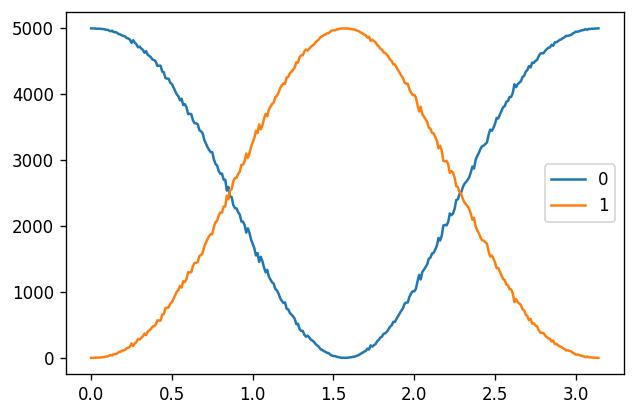

In [49]:
df = pd.DataFrame()

for x in tqdm(np.arange(0, np.pi, 0.01)):
    qc = QuantumCircuit(1, 1)
    qc.rx(x, 0)
    qc.rz(x, 0)
    qc.ry(x, 0)
    qc.measure(0, 0)

    circ = transpile(qc, backend)
    qobj = assemble(circ, shots=shots)
    result = backend.run(qobj).result()
    counts = result.get_counts()

    df_temp = pd.DataFrame(counts, index=[1])
    df_temp["rot_value"] = x

    df = pd.concat([df, df_temp])

df = df.fillna(0)

plt.figure(dpi=120)
try:
    plt.plot(df["rot_value"], df["0"], label="0")
except KeyError:
    pass

try:
    plt.plot(df["rot_value"], df["1"], label="1")
except KeyError:
    pass
plt.legend()
plt.show()

Now we have the global angle taking effect. However, it also means our value now isn't unique. Unless we take only $\pi/2$, or we can accept different answers. Now how about Rx and Rx stacked itself together? For this we will try for Ry and Ry as well, for arbitrary number of stacking, but Rz requires mixing with Rx and Ry (in fact, sandwiching) for it to work, so that won't be tried per se. 

100%|██████████| 315/315 [00:05<00:00, 59.69it/s]


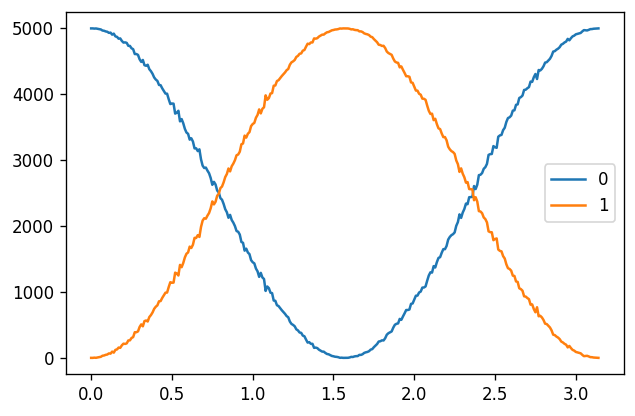

In [50]:
df = pd.DataFrame()

for x in tqdm(np.arange(0, np.pi, 0.01)):
    qc = QuantumCircuit(1, 1)
    qc.rx(x, 0)
    qc.rx(x, 0)
    qc.measure(0, 0)

    circ = transpile(qc, backend)
    qobj = assemble(circ, shots=shots)
    result = backend.run(qobj).result()
    counts = result.get_counts()

    df_temp = pd.DataFrame(counts, index=[1])
    df_temp["rot_value"] = x

    df = pd.concat([df, df_temp])

df = df.fillna(0)

plt.figure(dpi=120)
try:
    plt.plot(df["rot_value"], df["0"], label="0")
except KeyError:
    pass

try:
    plt.plot(df["rot_value"], df["1"], label="1")
except KeyError:
    pass
plt.legend()
plt.show()

100%|██████████| 315/315 [00:05<00:00, 60.07it/s]


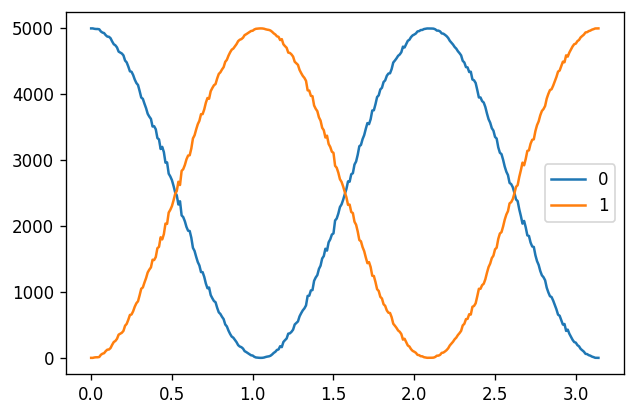

In [51]:
df = pd.DataFrame()

for x in tqdm(np.arange(0, np.pi, 0.01)):
    qc = QuantumCircuit(1, 1)
    qc.rx(x, 0)
    qc.rx(x, 0)
    qc.rx(x, 0)
    qc.measure(0, 0)

    circ = transpile(qc, backend)
    qobj = assemble(circ, shots=shots)
    result = backend.run(qobj).result()
    counts = result.get_counts()

    df_temp = pd.DataFrame(counts, index=[1])
    df_temp["rot_value"] = x

    df = pd.concat([df, df_temp])

df = df.fillna(0)

plt.figure(dpi=120)
try:
    plt.plot(df["rot_value"], df["0"], label="0")
except KeyError:
    pass

try:
    plt.plot(df["rot_value"], df["1"], label="1")
except KeyError:
    pass
plt.legend()
plt.show()

So we can see they actually form different number of standing nodes depending on how many Rx are stacked together. We hypothesize this is the same for Ry. Let's prove. 

100%|██████████| 315/315 [00:05<00:00, 62.58it/s]


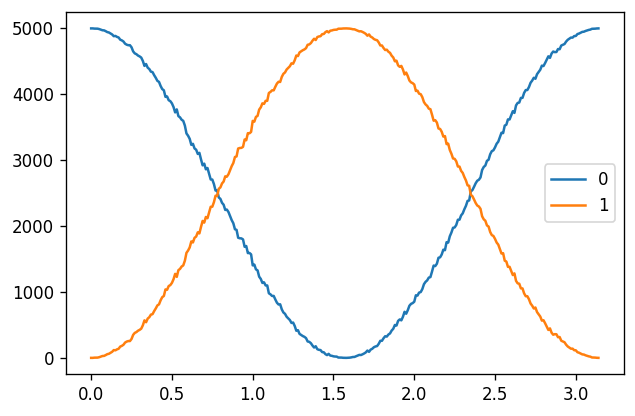

In [52]:
df = pd.DataFrame()

for x in tqdm(np.arange(0, np.pi, 0.01)):
    qc = QuantumCircuit(1, 1)
    qc.ry(x, 0)
    qc.ry(x, 0)
    qc.measure(0, 0)

    circ = transpile(qc, backend)
    qobj = assemble(circ, shots=shots)
    result = backend.run(qobj).result()
    counts = result.get_counts()

    df_temp = pd.DataFrame(counts, index=[1])
    df_temp["rot_value"] = x

    df = pd.concat([df, df_temp])

df = df.fillna(0)

plt.figure(dpi=120)
try:
    plt.plot(df["rot_value"], df["0"], label="0")
except KeyError:
    pass

try:
    plt.plot(df["rot_value"], df["1"], label="1")
except KeyError:
    pass
plt.legend()
plt.show()

100%|██████████| 315/315 [00:05<00:00, 62.83it/s]


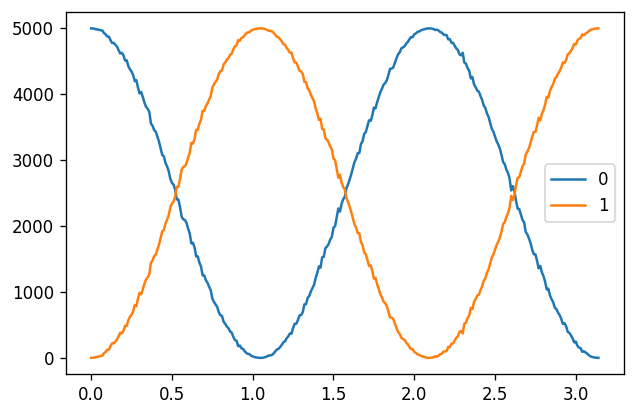

In [53]:
df = pd.DataFrame()

for x in tqdm(np.arange(0, np.pi, 0.01)):
    qc = QuantumCircuit(1, 1)
    qc.ry(x, 0)
    qc.ry(x, 0)
    qc.ry(x, 0)
    qc.measure(0, 0)

    circ = transpile(qc, backend)
    qobj = assemble(circ, shots=shots)
    result = backend.run(qobj).result()
    counts = result.get_counts()

    df_temp = pd.DataFrame(counts, index=[1])
    df_temp["rot_value"] = x

    df = pd.concat([df, df_temp])

df = df.fillna(0)

plt.figure(dpi=120)
try:
    plt.plot(df["rot_value"], df["0"], label="0")
except KeyError:
    pass

try:
    plt.plot(df["rot_value"], df["1"], label="1")
except KeyError:
    pass
plt.legend()
plt.show()

Note that we also nullify one of our conclusion above; that is, Rz actually does not have any effect at all. The reason why the output is such and such is because of Rx and Ry only. So Rz totally have no effect on this. Perhaps it might if there are interference, but at least for this non-interfering, it has no effect seen. 

### To be done: Two qubit circuits. 